**Následující dvě hypotézy ověříme s 95% jistotou.**

### Hypotéza 1:

*Na silnicích první třídy se byly nehody s následky na zdraví se stejnou pravděpodobností
jako na dálnicích.*

K ověření hypotézy využijte 𝜒2 test s tím, že také určíte, jestli nehody na silnicích 1. třídy
vedly častěji či méně často k nehodě s následky na zdraví (sloupec p9) než na dálnicích
(p36). V tom vám může pomoct “expected” výstup 𝜒2 testu.


Kontingenční tabulka:
p9      1      2
p36             
0    1247   6674
1    7059  14773

Výsledek chí-kvadrát testu
Chí-kvadrát statistika: 794.15
P-hodnota: 0.0000
Stupně volnosti: 1
Očekávané hodnoty kontingenční tabulky:
[[ 2211.26696468  5709.73303532]
 [ 6094.73303532 15737.26696468]]

Nulovou hypotézu zamítáme, tudíž nehody s následkem na zdraví nebyly se stejnou pravděpodobností na obou typech silnic.


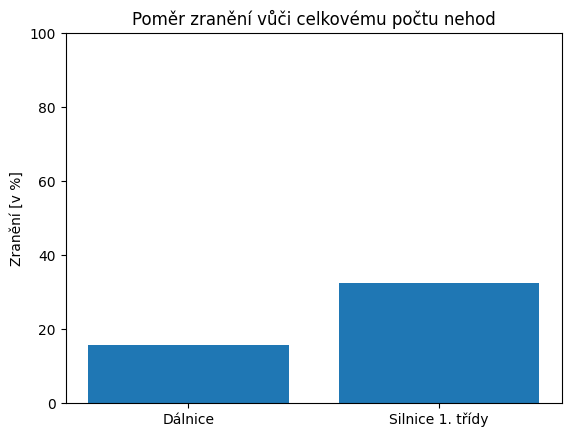

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Load data
df = pd.read_pickle('accidents.pkl.gz')

# Filter only highways and first class roads
df = df[df['p36'].isin([0, 1])]
contingency_table = pd.crosstab(df['p36'], df['p9'])

print('\nKontingenční tabulka:')
print(contingency_table)

x2, p_value, DF, expected = scipy.stats.chi2_contingency(contingency_table)

print('\nVýsledek chí-kvadrát testu')
print(f'Chí-kvadrát statistika: {x2:.2f}')
print(f'P-hodnota: {p_value:.4f}')
print(f'Stupně volnosti: {DF}')
print('Očekávané hodnoty kontingenční tabulky:')
print(expected)

alpha = 0.05
if p_value < alpha:
    print('\nNulovou hypotézu zamítáme, tudíž nehody s následkem na zdraví nebyly se stejnou pravděpodobností na obou typech silnic.')
else:
    print('\nNulovou hypotézu nezamítáme, takže nevíme, jestli nehody byly, či nebyly na obou typech silnic se stejnou pravděpodobností.')

# Graph of ratio of injuries to number of accidents
road = ['Dálnice', 'Silnice 1. třídy']
percentages_of_injury = [contingency_table.loc[0, 1] / contingency_table.loc[0].sum() * 100,
                        contingency_table.loc[1, 1] / contingency_table.loc[1].sum() * 100]
plt.bar(road, percentages_of_injury)
plt.ylabel('Zranění [v %]')
plt.title('Poměr zranění vůči celkovému počtu nehod')
plt.ylim(0, 100)
plt.show()


Lze z výsledku testu určit, že na obou typech silnic byl poměr zraněných rozdílný. Z grafu těchto poměrů lze vyčíst vyšší množství zranění vůči celkovému počtu nehod na silnicích 1. třídy.

### Hypotéza 2:

*Škoda při nehodách trolejbusů je nižší, než při nehodách autobusů a tato odchylka je
statisticky významná.*

Využijte vhodný test, který vyberete na základě distribuce dat, nevyužívejte 𝜒2 test. Určete,
zda je škoda na vozidlech vyšší či nižší a zda je tato vlastnost na požadované hladině
významnosti.

**Nulová hypotéza:**

Škoda při nehodách trolejbusů je stejná jako při nehodách autobusů.

**Alternativní hypotéza:**

Škoda při nehodách trolejbusů je *nižší*, než při nehodách autobusů a tato odchylka je
statisticky významná.

Počet nehod trolejbusů: 293
Počet nehod autobusů: 4284

T-test Results
T-statistika: -3.26
P-hodnota: 0.0006

Nulovou hypotézu zamítáme, takže škoda při nehodách trolejbusů je statisticky nižší než u autobusů.


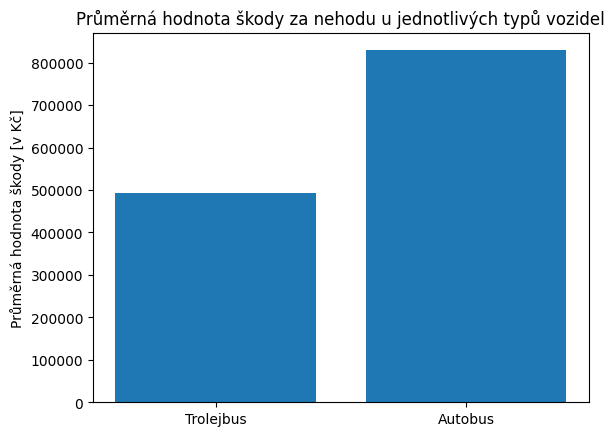

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Load data
df_accidents = pd.read_pickle('accidents.pkl.gz')
df_vehicles = pd.read_pickle('vehicles.pkl.gz')
df = pd.merge(df_accidents, df_vehicles, on='p1', how='inner')

# Filter trolleybuses and buses
trolleybus_accidents = df[df['p44'] == 11]
trolleybus_damages = trolleybus_accidents['p14*100']

bus_accidents = df[df['p44'] == 8]
bus_damages = bus_accidents['p14*100']

print(f'Počet nehod trolejbusů: {len(trolleybus_accidents)}')
print(f'Počet nehod autobusů: {len(bus_accidents)}')

# T-test for independent samples
t_statistic, p_value = scipy.stats.ttest_ind(trolleybus_damages, bus_damages, alternative='less')
print('\nT-test Results')
print(f'T-statistika: {t_statistic:.2f}')
print(f'P-hodnota: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print('\nNulovou hypotézu zamítáme, takže škoda při nehodách trolejbusů je statisticky nižší než u autobusů.')
else:
    print('\nNulovou hypotézu nezamítáme, a tudíž nevíme, zda je škoda při nehodách trolejbusů opravdu nižší než při nehodách autobusů.')

# Graph of average price for accident
vehicle = ['Trolejbus', 'Autobus']
average_price = [trolleybus_damages.sum() / len(trolleybus_accidents),
                 bus_damages.sum() / len(bus_accidents)]
plt.bar(vehicle, average_price)
plt.ylabel('Průměrná hodnota škody [v Kč]')
plt.title('Průměrná hodnota škody za nehodu u jednotlivých typů vozidel')
plt.show()


Použitý byl jednostranný T-test s nezávislámi vzorky, protože trolejbus se nemůže objevit ve skupině autobusů a obráceně. Jednostranný byl zvolen, protože nás zajímá pokud se hodnoty škody u obou skupin rovnají, nebo pokud je u trolejbusů nižší.

Jelikož jsme z jednostranného T-testu s nezávislými vzorky zamítli nulovou hypotézu, platí alternativní hypotéza. Lze tedy říct, že škoda u nehod trolejbusů je statisticky nižší než u autobusů a toto lze vidět i v grafu.